In [7]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph , START , END
import random

In [8]:
class AgentState(TypedDict):
  name:str
  guesses:list[int]  # Corrected spelling
  attempts:int
  lower_bound:int
  upper_bound:int
  
rightNumber = 10

In [9]:
def  setup (state:AgentState)->AgentState:
  state['attempts'] = 0
  state['guesses'] = []  # Corrected spelling
  return state

def guess(state:AgentState)->AgentState:
  ''' Function Guess randomly the number '''    
  low = state['lower_bound']
  upper = state['upper_bound']
  state['guesses'].append(random.randint(low, upper))  # Corrected spelling
  state['attempts'] += 1
  return state
  
def hint(state:AgentState)->AgentState:
  # 0 ==> right / 1 ==> higher / -1 ==> lower
  '''Function return hint to the node'''
  lastGuess = state['guesses'][-1]
  rightNumber = 10
  if(lastGuess > rightNumber):
    state['upper_bound'] = lastGuess
  elif(lastGuess < rightNumber):
    state['lower_bound'] = lastGuess
  
    
  return state
    
def decide(state:AgentState)->str:
  if(rightNumber == state['guesses'][-1] ):
    print(f"Agent succeded at attempt {state['attempts']}")
    return "end"
  elif(state['attempts']>7):
    print(f"Agent failed,last guess is {state['guesses'][-1]}")
    return "end"
  else:
    return "continue"
      



In [10]:
graph = StateGraph(AgentState)
graph.add_node("setup_node",setup)
graph.add_node("guess_node",guess)
graph.add_node("hint_node",hint)
graph.add_edge(START , "setup_node")
graph.add_edge("setup_node" , "guess_node")
graph.add_edge("guess_node" , "hint_node")
graph.add_conditional_edges("hint_node",decide,{
  "continue":"guess_node",
  "end":END
})
app = graph.compile()


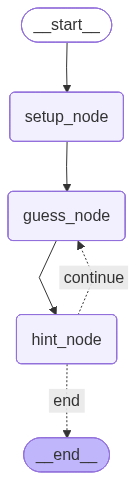

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({"lower_bound":0,"upper_bound":20,"name":"shawky","attempts":0 , "guesses":[]}) # type: ignore

Agent succeded at attempt 6
